# Training Simple Machine Learning Algorithm for Classification

In this chapter, we will make use of two of the first algorithmically described machine learning algorithms for classification, the perceptron and adaptive linear neurons. We will start by implementing a perceptron step by step in Python and training it to classify different flower species in the Iris dataset. This will help us to understand the concept of machine learning algorithms for classification and how they can efficiently implemented in Python. 

The topics that we will cover in this chapter are as follows:
* Building an intuition of machine learning algorithms
* Using Pandas, NumPy, and Matplotlib to read int, process, and visualize data
* Implementing linear classification algorithms in Python

# Artificial neurons - a brief glimpse into the early history of machine learning

Trying to nderstand how the biological brain works, in order to design AI, Warren McCullock and Walter Pitts published the first concept of a simplified brain cell, the so-called **McCullock-Pitts (MCP) neuron**, in 1943. Neurons are interconnected nerve cells in the brain that are involved in the processing and transmitting of chemical and electrical signals, which is illustrated in the following figure:

<img src='images/02_01.png'>

McCullock and Pitts described such a nerve cell as a simple logic gate with binary outputs; multiple signals at the dendrites, are then integrated into the cell body, and, if the accumulated signal exceeds a certain threshold, an output signal is generated that will be passed on by the axon. 

Only a few years later, Frank Rosenblatt published the first concept of the perceptron learning rule based on the MCP neuron model. With his perceptron rule, Rosenblatt proposed an algorithm that would automatically learn the optimal weight coefficients that are then multiplied with the input features in order to make the decision of whether a neuron fires or not. In the context of supervised learning and classification, such an algorithm could then be used to predict if a sample belongs to one class or the other.

# The formal definition of an artificial neuron

More formally, we can put the idea behind **artificial neurons** into the context of a binary classification task where **we refer to out two classes as 1 (positive class) and -1 (negative class)** for simplicity. We can then define a decision function $\phi(z)$ that takes a linear combination of certain input values $x$ and a corresponding weight vetor $w$, where $z$ is the so-called net input: $z = w_1 \cdot x_1 + ... + w_m \cdot x_m$

Now, if the net input of a particular sample $x^{(i)}$ is greater than a defined threshold $\theta$, we predict class 1, and class -1 otherwise. In the perceptron algorithm, the decision function $\phi$ is a variant of a **unit step function**:

\begin{equation}
\phi(z) = 
\begin{cases}
    -1, & \text{if}\ z \ge \theta \\
    1, & \text{otherwise}
\end{cases}
\end{equation}

For simplicity, we can bring the threshold $\theta$ to the left side of the equation and define a weight-zero as $w_0 = -\theta$ and $x_0 = 1$ so that we write $z$ in the more compact form: 

$$z = w_0 \cdot x_0 + w_1 \cdot x_1 + ... + w_m \cdot x_m = w^T \cdot x$$

And:

\begin{equation}
\phi(z) = 
\begin{cases}
    1, & \text{if}\ z \ge \theta \\
    -1, & \text{otherwise}
\end{cases}
\end{equation}

In machine learning literature, the negative threshold, or weight, $w_0 = -\theta$, is usually called the **bias unit**. 

The following figure illustrates how the net input $z = w^T \cdot x$ is squashed into a binary output (-1 or 1) by the decision function of the perceptron (left subfigure) and how it can be used to discriminate between two linearly separable classes (right subfigure):

<img src='images/02_02.png'>

# The perceptron learning rule

The whole idea behind the MCP neuron and Rosenblatt's thresholded perceptron model is to use a reductionist approach to mimic how a single neuron in the brain works: it either fires or it does not. Thus, Rosenblatt's initial perceptron rule is fairly simple and can be summarized by the following steps: 
1. Initialize the weights to 0 or small random numbers. 
2. For each training sample $x^{(i)}$:
    1. Compute the output value $ŷ$. 
    2. Update the weights.

Here, the output value is the class label predict by the unit step function that we defined earlier, and the simultaneous update of each weight $w_j$ in the weight vector $w$ can be more formally written as:
$$w_j = w_j + \Delta w_j$$

The value of $\Delta w_j$, which is used to update the weight $w_j$, is calculated by the perceptron learning rule:
$$\Delta w_j = \alpha \cdot (y^{(i)} - ŷ^{(i)}) \cdot x^{(i)}_j$$

Where $\alpha$ is the **learning rate** (typically a constant between 0.0 and 1.0), $y^{(i)}$ is the **true class label** of the *i*th training sample, and $ŷ^{(i)}$ is the **predicted class label**. It is important to note that all weights in the weight vector are being updated simultaneously, which means that we do not recompute the $ŷ^{(i)}$ before all of the weights $\Delta w_j$ are updated. 

Before we implement the perceptron rule in Python, let us make a simple thought experiment to illustrate how beautifully simple this learning rule really is. In the two scenarios where the perceptron predicts the class label correctly, the weights remain unchanged: 

$$\Delta w_j = \alpha \cdot (-1--1) \cdot x^{(i)}_j = 0$$

$$\Delta w_j = \alpha \cdot (1-1) \cdot x^{(i)}_j = 0$$

However, in the case of a wrong prediction, the weights are being pushed towards the direction of the positive or negative target class:

$$\Delta w_j = \alpha \cdot (1--1) \cdot x^{(i)}_j = \alpha \cdot (2) \cdot x^{(i)}_j$$

$$\Delta w_j = \alpha \cdot (-1-1) \cdot x^{(i)}_j = \alpha \cdot (-2) \cdot x^{(i)}_j$$

It is important to note that the convergence of the perceptron is only guaranteed if the two classes are **linearly separable** and **the learning rate is sufficiently small**. If the two classes cannot be separated by a linear decision boundary, we can set a maximum number of passes over the training dataset (**epochs**) and/or threshold for the number of tolerated misclassifications, the perceptron would never stop updating the weights otherwise: 

<img src='images/02_03.png'>

Now, before we jump into the immplementation in the next section, letus summarize what we just learned in a simple diagram that illustrates the general concept of the perceptron: 

<img src='images/02_04.png'>

The preceding diagram illustrates how the perceptron receives the inputs of a sample $x$ and combines them with the weights $w$ to compute the net input. The net input is then passed on the threshold function, which generates a binary output, -1 or +1, the predicted class label for the sample. During the learning phase, this output is used to calculate the error of the prediction and update the weights.

# Implementing a perceptron learning algorithm in Python

In the previous section, we learned how the Rosenblatt's perceptron rule works; let us now go ahead and implement it in Python, and apply it to the Iris dataset.

We will take an object-oriented approach to define the perceptron interface as a Python class, which allows us to initialize new *Perceptron* objects that can learn from data via a *fit* method, and make predictions via a separate *predict* method. As a convention, we append an underscore (\_) to attributes that are not being created upon the initialization of the object but by calling the object's other methods, for example, *self.w\_*. The followng is the implementation of a perceptron:

In [8]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier. 
    
    Parameters
    ---------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset. 
    random_state : int
        Random number generator seed for random weight 
        initialization. 
        
    Attributes
    ---------------
    w_ : 1d-array
        Weights after fitting. 
    errors_ : list
        Number of misclassifications (updates) 
        in each epoch.     
    """
    
    def __init__(self, eta=0.01, n_iter=50, 
                 random_state=1): 
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ---------------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the 
            number of samples and n_features is the 
            number of features. 
        y : array-like, shape = [n_samples]
            Target values.
            
        Returns
        ---------------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, 
                              size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = (self.eta * 
                         (target - self.predict(xi)))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

Using this perceptron implementation, we can now initialize new *Perceptron* objects with a given learning rate *eta* and *n_iter*, which is the number of epochs (passes over the training set). Via the *fit* method, we initialize the weights in *self.w\_* to a vector of float numbers in the shape $m + 1$, where $m$ stands for the number of dimensions (features) in the dataset, where we add 1 for the first element in this vector that represents the bias unit. Remember that the first element in this vector, *self.w\_[0]*, represent the so-called bias unit that we discussed earlier. 

Also notice that this vector contains small random numbers drawn from a normal distribution with standard deviation $0.01$ via *rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])*, where *rgen* is a NumPy random number generator that we seeded with a user-specified random seed so that we can reproduce previous results if desired. 

Now, the reason we do not initialize the weights to zero is that the learning rate $\alpha$ (eta) only has an effect on the classification outcome if the weights are initialized to non-zero values. If all the weights are initialized to zero, the learning rate parameter *eta* affects only the scale of the weight vector, not the direction. 

The reason why we have drawn the random numbers from a random normal distribution, for example, instead from a uniform distribution, and why we used a standard deviation of 0.01 was arbitrary; remember, we are just interested in small random values to avoid the properties of all-zero vectors as discussed earlier. 

After the weights have been initialized, the *fit* method loops over all individual samples in the training set and updates the weights according to the perceptron learning rule that we discussed in the previous section. The class labels are predicted by the *predict* method, which is called in the *fit* method to predict the class labels of new data after we have fitted our model. Futhermore, we also collect the number of misclassifications during each epoch in the *self.errors\_* list so that we can later analyze how well our perceptron performed during the training. The *np.dot* function that is used in the *net_input* method simply calculates the vector dot product $w^T \cdot x$. 

# Training a perceptron model on the Iris Dataset

To test our perceptron implementation, we will load the two flower classes Setosa and Versicolor from the Iris dataset. Although the perceptron rule is not restricted to two dimensions, we will only consider the two features sepal length and petal length for visualization purposes. Also, we only chose the two flower classes Setosa and Versicolor for practical reasons. However, the perceptron algorithm can be extended to multi-class classification, for example, the **One-versus-All (OvA)** technique. 

OvA, or sometimes also called **One-versus-Rest (OvR)**, is a technique that allows us to extend a binary classifier to multi-class problems. Using OvA, we can train one classifier per class, where the particular class is treated as the positive class and the samples from all other classes are considered negative classes. In we were to classify a new data sample, we would use our *n* classifiers, where *n* is the number of class labels, and assign the class label with the highest confidence to the particular sample. In the case of the perceptron, we would use OvA to choose the class label that is associated with the largest absolute net input value. 

First, we will use the *Pandas* library to load the Iris dataset directly from the *UCI Machine Learning Repository* into a *DataFrame* object and print the last five line via the *tail* method to check the data was loaded correctly:

In [5]:
import pandas as pd

# To work offline: 
df = pd.read_csv('data/iris.data', header=None)

# To work online: 
# df = pd.read_csv('https://archive.ics.uci.edu/ml/'
#                  'machine-learning-databases/iris/'
#                  'iris.data', header=None)

df.tail()

0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

Next, we extract the first 100 class labels that correspond to the 50 *Iris-setosa* and 50 *Iris-versicolor* flowers, and convert the class labels into the two integer class label 1 (versicolor) and -1 (setosa) that we assign to a vetor *y*, where the *values* method of Pandas *DataFrame* yields the corresponding NumPy representation. 

Similarly, we extract the first feature column (sepal length) and the third feature (petal length) of those 100 training samples and assign them to a feature matrix x, which we can visualize via a two-dimensional scatter plot:

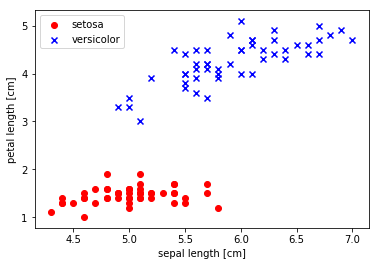

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', 
            marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', 
            marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

The preceding scatterplot shows the distribution of flower samples in the Iris dataset along the two features axes, petal length and sepal length. In this two-dimensional feature subspace, we can see that a linear decision boundary should be sufficient to separate Setosa from Versicolor flowers. Thus, a linear classifier such as perceptron should be able to classify the flowers in this dataset perfectly. 

Now, it's time to train our perceptron algorithm on the Iris data subset that we just extracted. Also, we will plot the misclassification error for each epoch to check whether the algorithm converged and found a decision boundary that separates the two Iris flower classes: 

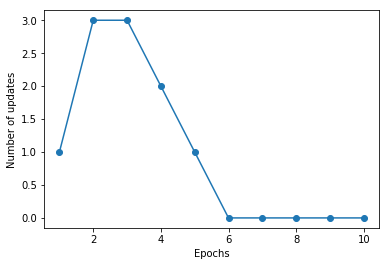

In [9]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), 
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

As we can see in the preceding plot, our perceptron converged after the sixth epoch and should now be able to classify the training samples perfectly. Let us implement a small convenience function to visualize the decision boundaries for two-dimensional datasets:

In [14]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], 
                    alpha=0.8, c=colors[idx], 
                    marker=markers[idx], label=cl, 
                    edgecolor='black')

First, we define a number of *color* and *markers* and create a colormap from the list of colors via *ListedColorMap*. Then, we determine the minimum and maximum values for the two features and use those feature vectors to create a pair of grid arrays *xx1* and *xx2* via the NumPy *meshgrid* function. Since we trained our perceptron classifier on two feature dimensions, we need to flatten the grid arrays and create a matrix that has the same number of columns as the Iris training subset so that we can use the *predict* method to predict the class labels *z* of the corresponding grid points. 

After reshaping the predicted class labels Z into a grid with the same dimensions as *xx1* and *xx2*, we can now draw a contour plot via Matplotlib *contourf* function, which maps the different decision regions to different colors for each predicted class in the grid array:

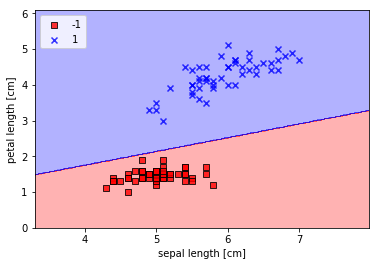

In [15]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

As we can see in the plot, the perceptron learned a decision boundary that is able to classify all flower samples in the Iris training subset perfectly.